<a href="https://colab.research.google.com/github/heyubaidullah/paralanguage-communication/blob/main/Paralanguage_Communication_v4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dataset

In [ ]:
import zipfile
zip_ref=zipfile.ZipFile("/content/drive/MyDrive/Hand_Gesture_Dataset_ASL_ISL.zip",'r')
zip_ref.extractall("/content/Hand_gesture_Dataset_ISL_ASL")
zip_ref.close()

In [ ]:
# %% Import lib
import os
import random
import joblib
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from ast import dump

# %% Config
train_dir = os.path.join("/content/Hand_gesture_Dataset_ISL_ASL/Hand_Gesture_Dataset_ASL_ISL")
num_class = 50
batch_size = 64
img_height, img_width, k = 200 , 200, 3
# train_dir, img_height, img_width, k, num_class

# Resize the images in the dataset

In [ ]:
from PIL import Image
import os

# Directory containing your images
dataset_dir = '/content/Hand_gesture_Dataset_ISL_ASL/Hand_Gesture_Dataset_ASL_ISL'

# Target dimensions
target_height = 200
target_width = 200

# Function to resize images
def resize_images(directory):
    for root, _, files in os.walk(directory):
        for filename in files:
            if filename.endswith('.jpg') or filename.endswith('.png'):  # Add other image formats as needed
                img_path = os.path.join(root, filename)
                with Image.open(img_path) as img:
                    resized_img = img.resize((target_width, target_height), Image.ANTIALIAS)
                    resized_img.save(img_path)  # Overwrite the original image with the resized one

#Call the function to resize images
resize_images(dataset_dir)

print("Images resized successfully!")


<ipython-input-4-9b28396fdc20>:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize((target_width, target_height), Image.ANTIALIAS)


Images resized successfully!


In [ ]:
from PIL import Image
import os

# Directory containing your images
dataset_dir = '/content/Hand_gesture_Dataset_ISL_ASL/Hand_Gesture_Dataset_ASL_ISL'

# Function to find image dimensions
def find_image_dimensions(directory):
    image_dimensions = set()  # Use a set to store unique image dimensions
    for root, _, files in os.walk(directory):
        for filename in files:
            if filename.endswith('.jpg') or filename.endswith('.png'):  # Add other image formats as needed
                img_path = os.path.join(root, filename)
                with Image.open(img_path) as img:
                    width, height = img.size
                    image_dimensions.add((width, height))
    return image_dimensions

# Call the function to find dimensions
image_dimensions = find_image_dimensions(dataset_dir)

# Print unique image dimensions
print("Image dimensions in the dataset:")
for width, height in image_dimensions:
    print(f"Width: {width}, Height: {height}")


Image dimensions in the dataset:
Width: 200, Height: 200


# Split the Dataset

In [ ]:
import os
import shutil

# Define paths
train_dir = '/content/train_Dataset'
test_dir = '/content/test_Dataset'

# Create train and test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define split ratio
split_ratio = 0.8  # 80% for training, 20% for testing

# Iterate through subfolders (labels)
for label in os.listdir(dataset_dir):
    label_dir = os.path.join(dataset_dir, label)
    images = os.listdir(label_dir)
    num_train = int(len(images) * split_ratio)
    train_images = images[:num_train]
    test_images = images[num_train:]

    # Move images to train directory
    for image in train_images:
        src = os.path.join(label_dir, image)
        dst = os.path.join(train_dir, label, image)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy(src, dst)

    # Move images to test directory
    for image in test_images:
        src = os.path.join(label_dir, image)
        dst = os.path.join(test_dir, label, image)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copy(src, dst)


In [ ]:
import tensorflow as tf

# Directory paths for train and test datasets
train_dir = '/content/train_Dataset'
test_dir = '/content/test_Dataset'

# Create training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    color_mode="rgb",
    interpolation="area",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Create testing dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    color_mode="rgb",
    interpolation="area",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Print class names
print(train_ds.class_names)
print(test_ds.class_names)

Found 34766 files belonging to 50 classes.
Found 8706 files belonging to 50 classes.
['ASL_A', 'ASL_B', 'ASL_C', 'ASL_D', 'ASL_E', 'ASL_F', 'ASL_G', 'ASL_H', 'ASL_I', 'ASL_J', 'ASL_K', 'ASL_L', 'ASL_M', 'ASL_N', 'ASL_O', 'ASL_P', 'ASL_Q', 'ASL_R', 'ASL_S', 'ASL_T', 'ASL_U', 'ASL_V', 'ASL_W', 'ASL_X', 'ASL_Y', 'ASL_Z', 'ISL_A', 'ISL_B', 'ISL_C', 'ISL_D', 'ISL_E', 'ISL_F', 'ISL_G', 'ISL_H', 'ISL_I', 'ISL_K', 'ISL_L', 'ISL_M', 'ISL_N', 'ISL_O', 'ISL_P', 'ISL_Q', 'ISL_R', 'ISL_S', 'ISL_T', 'ISL_U', 'ISL_V', 'ISL_W', 'ISL_X', 'ISL_Y']
['ASL_A', 'ASL_B', 'ASL_C', 'ASL_D', 'ASL_E', 'ASL_F', 'ASL_G', 'ASL_H', 'ASL_I', 'ASL_J', 'ASL_K', 'ASL_L', 'ASL_M', 'ASL_N', 'ASL_O', 'ASL_P', 'ASL_Q', 'ASL_R', 'ASL_S', 'ASL_T', 'ASL_U', 'ASL_V', 'ASL_W', 'ASL_X', 'ASL_Y', 'ASL_Z', 'ISL_A', 'ISL_B', 'ISL_C', 'ISL_D', 'ISL_E', 'ISL_F', 'ISL_G', 'ISL_H', 'ISL_I', 'ISL_K', 'ISL_L', 'ISL_M', 'ISL_N', 'ISL_O', 'ISL_P', 'ISL_Q', 'ISL_R', 'ISL_S', 'ISL_T', 'ISL_U', 'ISL_V', 'ISL_W', 'ISL_X', 'ISL_Y']


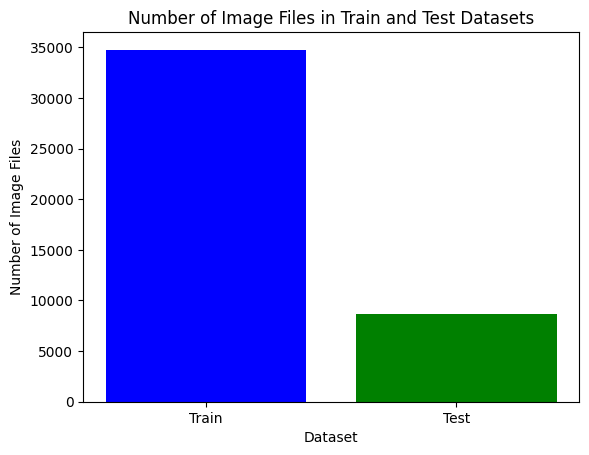

In [ ]:
import os
import matplotlib.pyplot as plt

# Directory paths for train and test datasets
train_dir = '/content/train_Dataset'
test_dir = '/content/test_Dataset'

# Function to count the number of image files in a directory
def count_images(directory):
    count = sum(len(files) for _, _, files in os.walk(directory))
    return count

# Count the number of image files in train and test datasets
train_count = count_images(train_dir)
test_count = count_images(test_dir)

# Plot the counts
plt.bar(['Train', 'Test'], [train_count, test_count], color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Number of Image Files')
plt.title('Number of Image Files in Train and Test Datasets')
plt.show()

# Samples in the Dataset

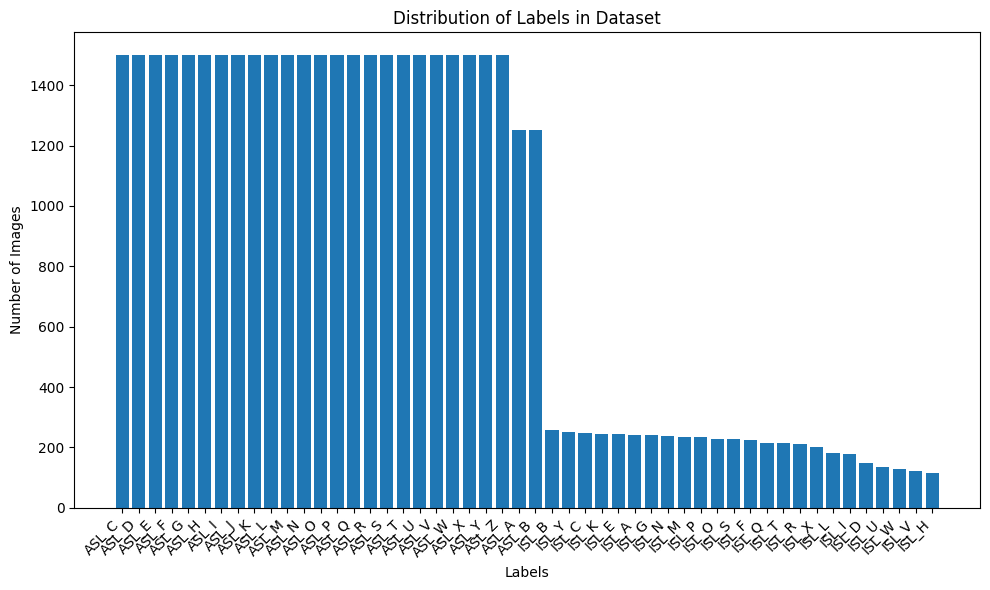

In [ ]:
import os
import matplotlib.pyplot as plt

# Directory containing your dataset
dataset_dir = '/content/Hand_gesture_Dataset_ISL_ASL/Hand_Gesture_Dataset_ASL_ISL'

# Get list of subfolders (assuming each subfolder represents a class/label)
labels = sorted(os.listdir(dataset_dir))

# Count number of images in each class
label_counts = {label: len(os.listdir(os.path.join(dataset_dir, label))) for label in labels}

# Sort labels by their counts
sorted_labels = sorted(label_counts.keys(), key=lambda x: label_counts[x], reverse=True)
sorted_counts = [label_counts[label] for label in sorted_labels]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_labels, sorted_counts)
plt.xlabel('Labels')
plt.ylabel('Number of Images')
plt.title('Distribution of Labels in Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


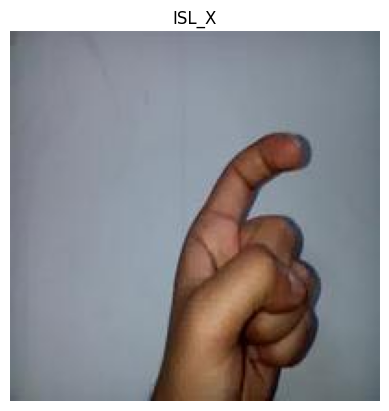

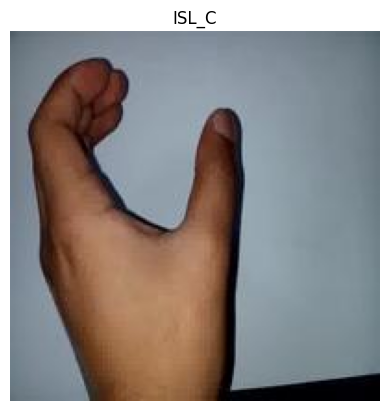

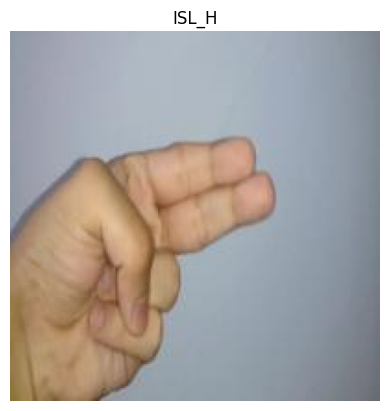

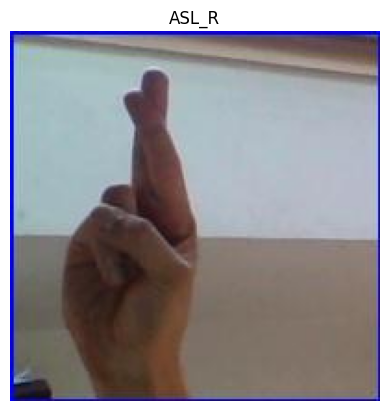

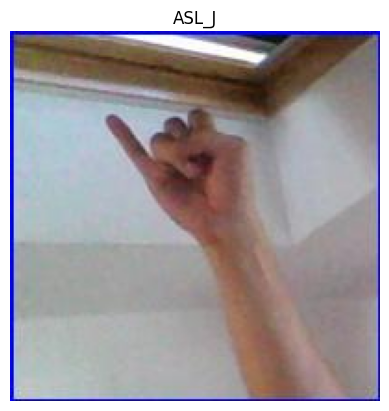

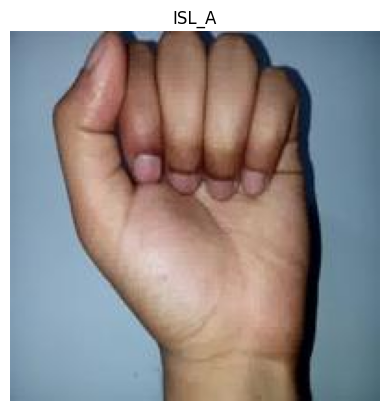

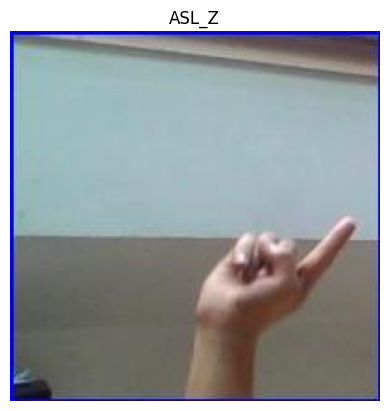

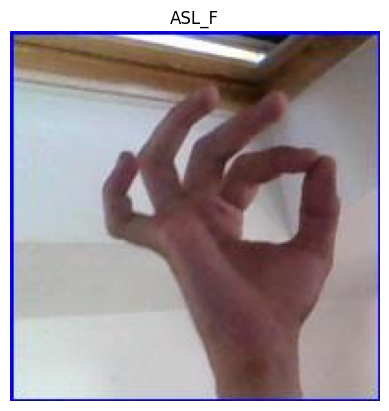

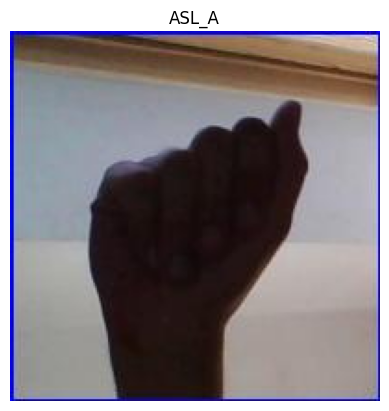

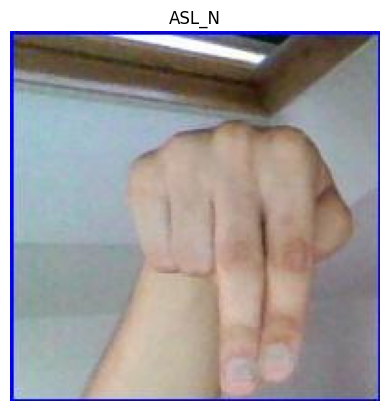

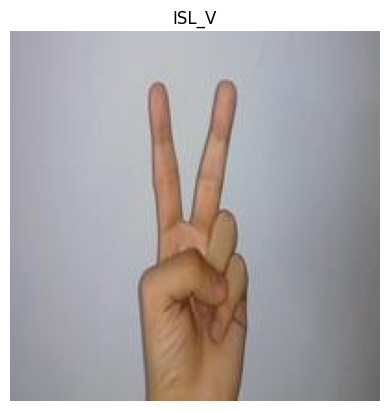

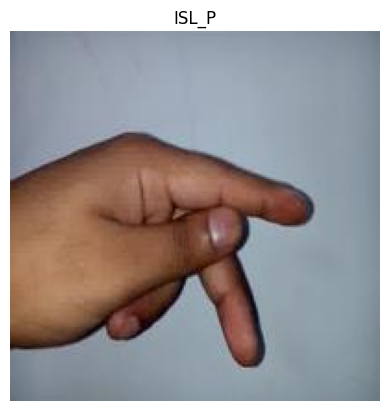

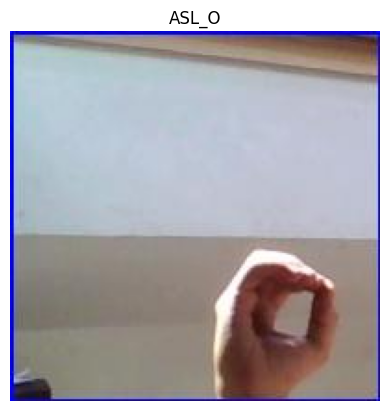

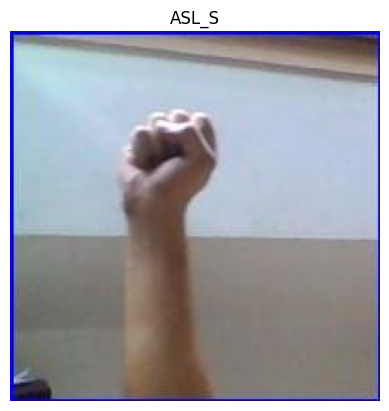

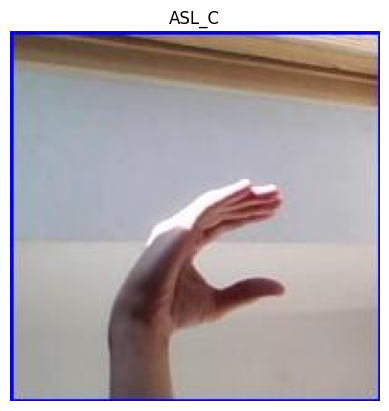

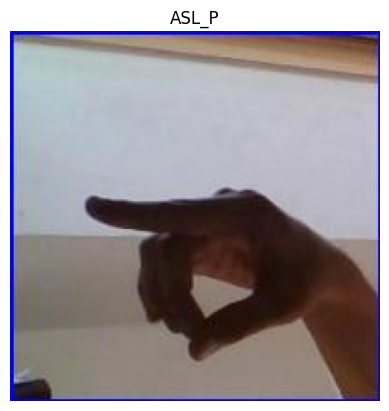

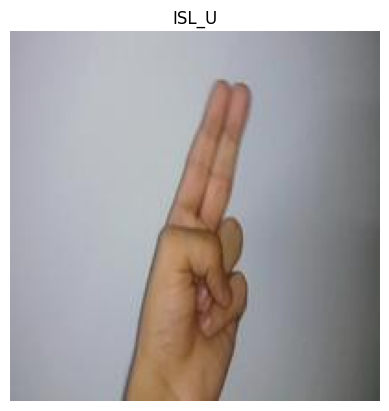

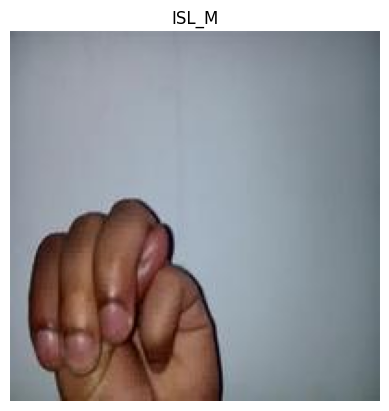

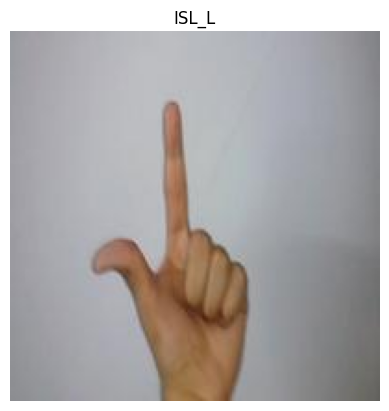

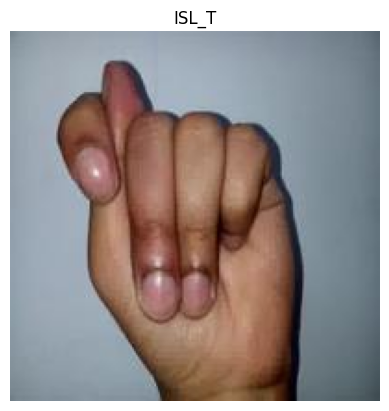

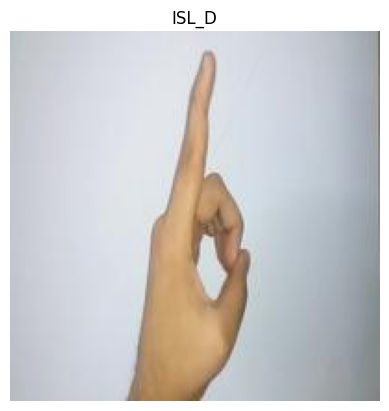

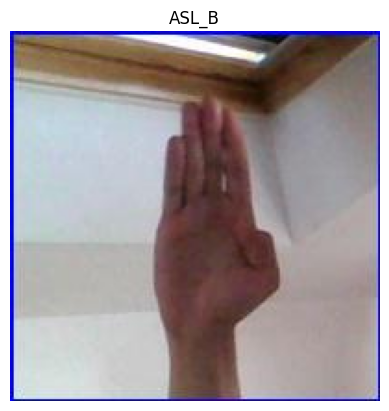

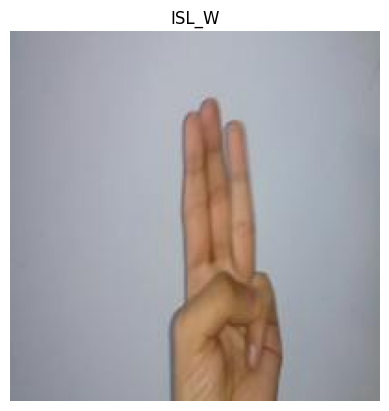

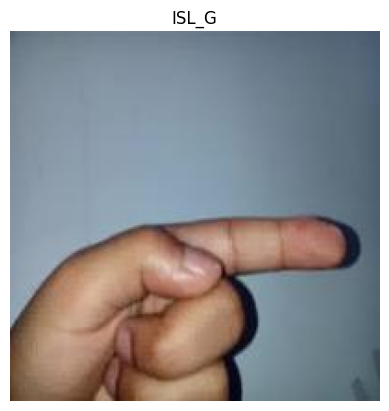

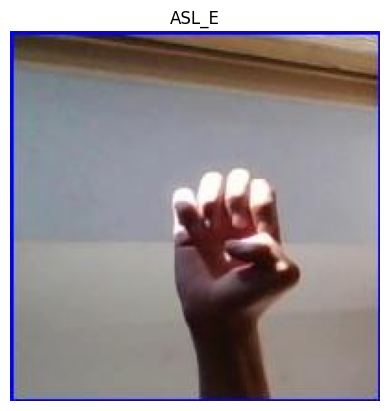

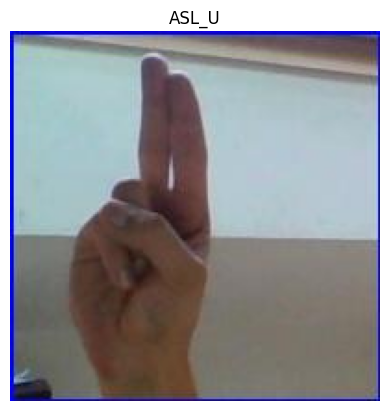

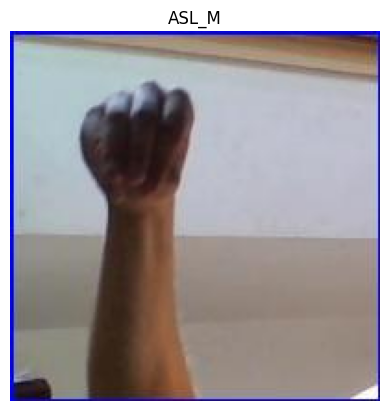

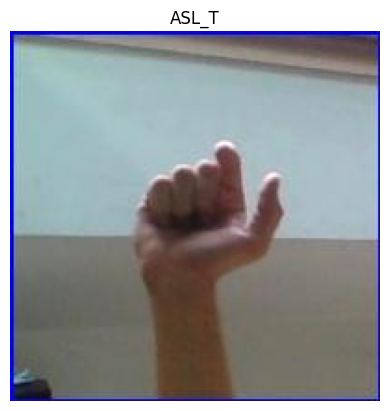

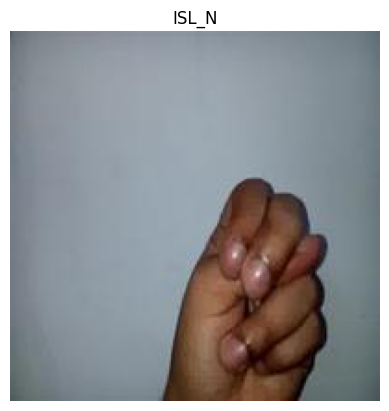

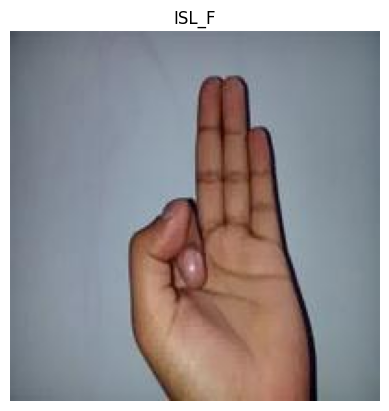

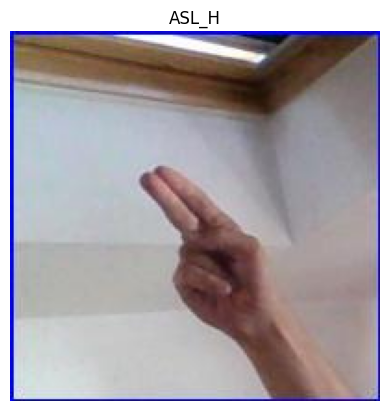

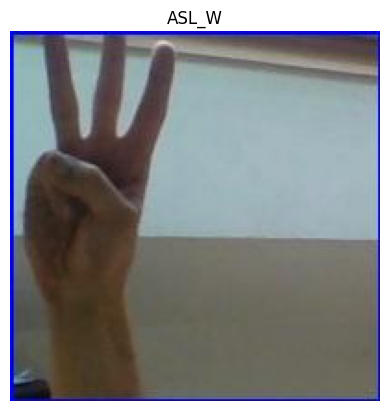

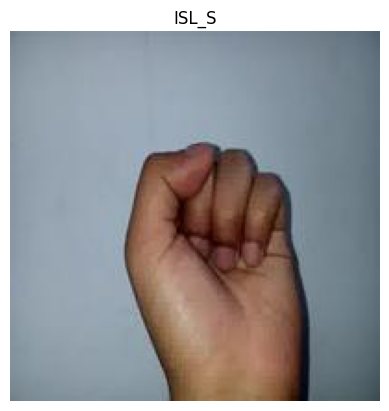

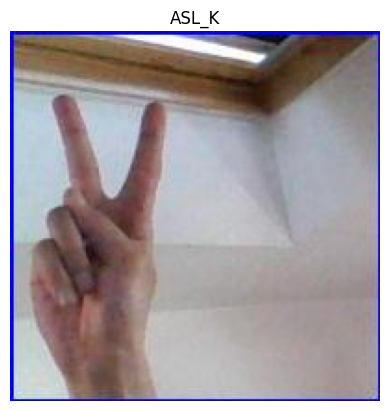

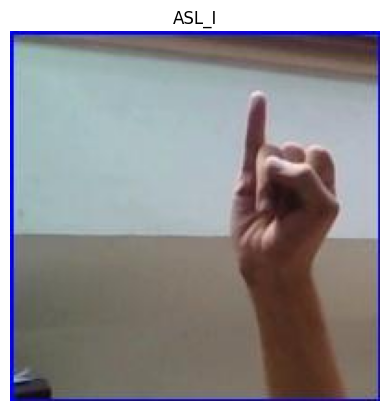

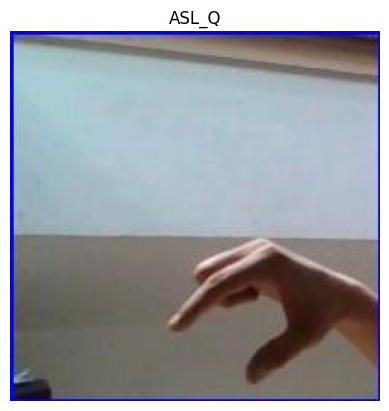

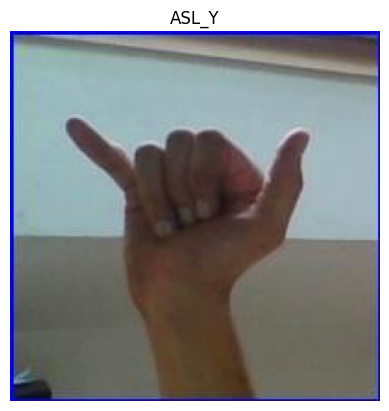

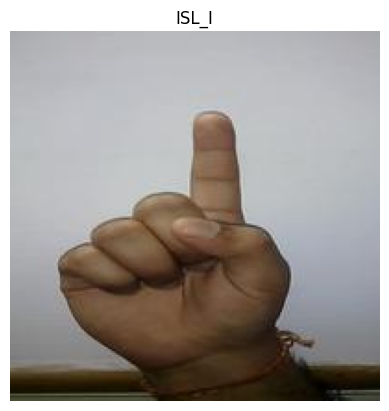

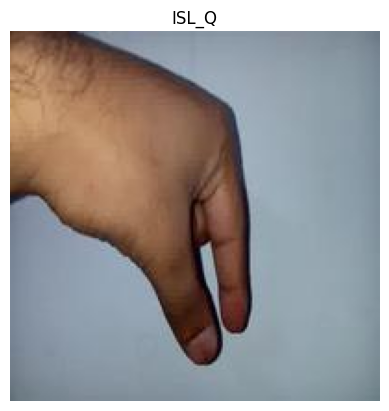

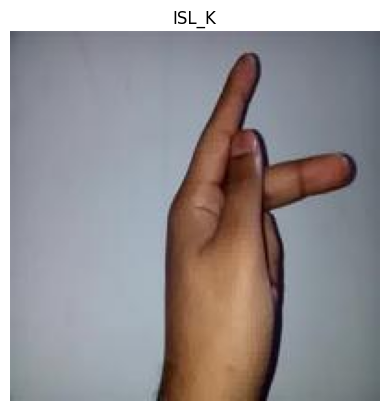

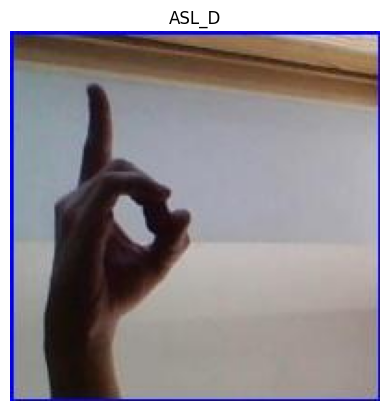

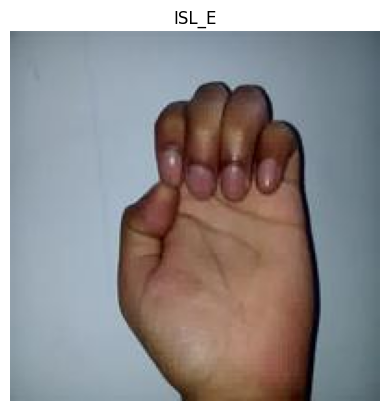

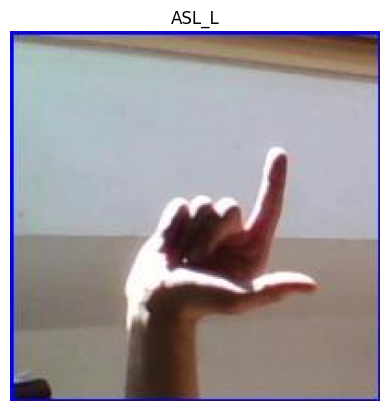

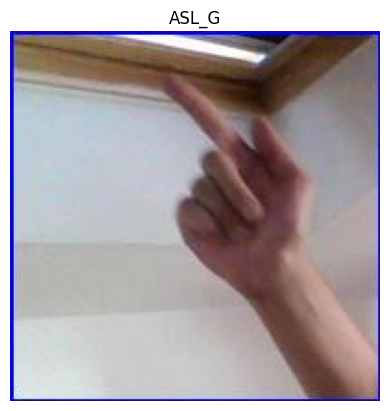

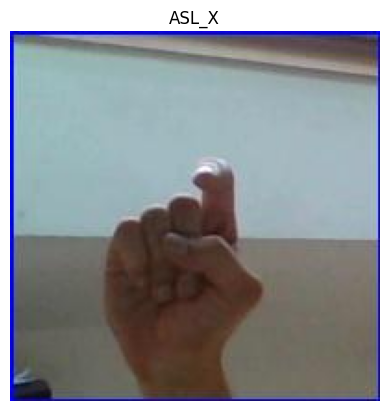

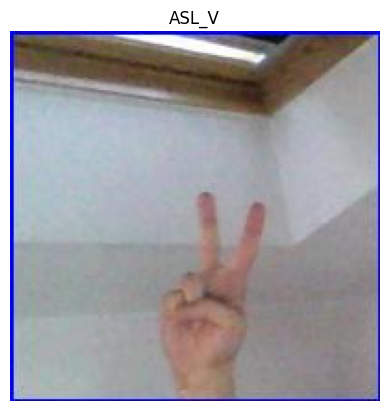

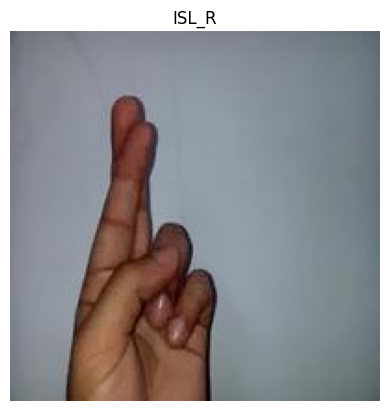

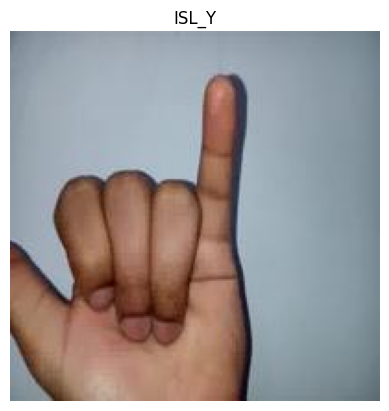

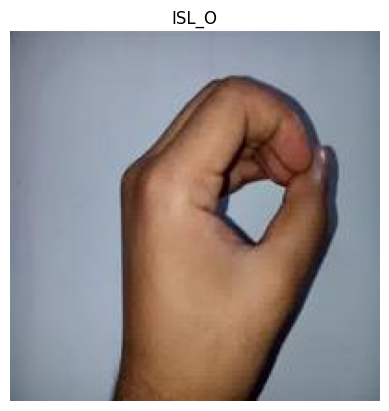

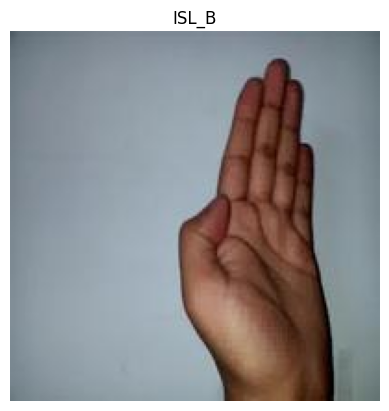

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Directory containing folders with images
base_dir = '/content/Hand_gesture_Dataset_ISL_ASL/Hand_Gesture_Dataset_ASL_ISL'

# Get list of folders in the base directory
folders = os.listdir(base_dir)

# Iterate through each folder
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        # Get list of images in the folder
        images = os.listdir(folder_path)
        if len(images) > 0:
            # Take the first image for display
            image_path = os.path.join(folder_path, images[0])
            # Display the image
            img = mpimg.imread(image_path)
            plt.imshow(img)
            plt.title(folder)  # Use folder name as label
            plt.axis('off')
            plt.show()

# Model

In [ ]:
# %% Create model like alexnet
model = tf.keras.models.Sequential()

# Input layer
model.add(tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, k))),
model.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

# Convolutional layers
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

# model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3, 3), padding="same", activation="relu"))
# model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())

# Fully connected layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_class, activation="softmax"))

In [ ]:
# %% Plot and compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)
new_learning_rate = 0.0001

# Set the learning rate of the optimizer
model.optimizer.lr = new_learning_rate
tf.keras.utils.plot_model(model, "Hand_Gesture.png", show_shapes=True)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 23, 23, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 256)       0

In [ ]:
# callbacks
callbacks = [
    #tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.001),
]

# Training

In [ ]:
# %% Training
n_epochs=20

new_training=1
if new_training:
    history = model.fit(train_ds,
                        validation_data=test_ds,
                        epochs=n_epochs,
                        callbacks=[callbacks])

Epoch 1/20
544/544 [==============================] - 55s 84ms/step - loss: 1.5383 - accuracy: 0.5562 - val_loss: 1.1571 - val_accuracy: 0.6822
Epoch 2/20
544/544 [==============================] - 44s 80ms/step - loss: 0.3569 - accuracy: 0.8838 - val_loss: 0.2988 - val_accuracy: 0.9042
Epoch 3/20
544/544 [==============================] - 45s 81ms/step - loss: 0.1381 - accuracy: 0.9558 - val_loss: 0.4285 - val_accuracy: 0.8962
Epoch 4/20
544/544 [==============================] - 47s 86ms/step - loss: 0.0758 - accuracy: 0.9751 - val_loss: 0.1888 - val_accuracy: 0.9429
Epoch 5/20
544/544 [==============================] - 44s 79ms/step - loss: 0.0573 - accuracy: 0.9818 - val_loss: 4.1262 - val_accuracy: 0.5535
Epoch 6/20
544/544 [==============================] - 43s 79ms/step - loss: 0.0415 - accuracy: 0.9862 - val_loss: 11.0433 - val_accuracy: 0.2728
Epoch 7/20
544/544 [==============================] - 43s 79ms/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.5679 - val_accuracy

# Test the model

In [ ]:
model.evaluate(test_ds)

137/137 [==============================] - 9s 66ms/step - loss: 1.2973 - accuracy: 0.8183


[1.297348976135254, 0.8182862401008606]

In [ ]:
print(history)

# Results

1/1 [==============================] - 0s 19ms/step


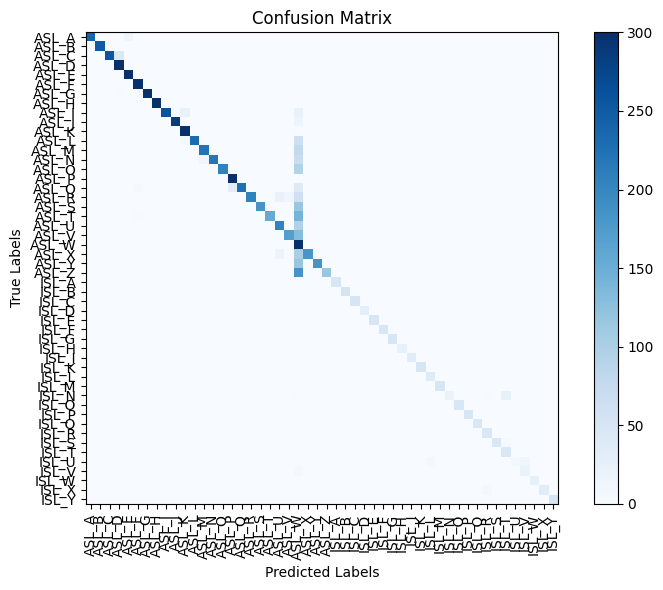

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Train your CNN model using train_ds dataset
# model.fit(train_ds, epochs=num_epochs)

# Evaluate your trained model using the test dataset
y_true = []
y_pred = []
for images, labels in test_ds:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(train_ds.class_names)), train_ds.class_names, rotation=90)
plt.yticks(np.arange(len(train_ds.class_names)), train_ds.class_names)
plt.tight_layout()
plt.show()


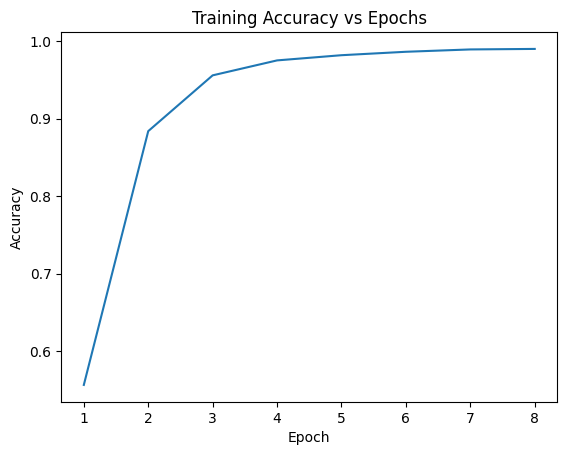

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and obtained the history object
# Replace history with your actual history object returned by model.fit()

# Extract training accuracy from history object
train_accuracy = history.history['accuracy']

# Plot training accuracy
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy)
plt.title('Training Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


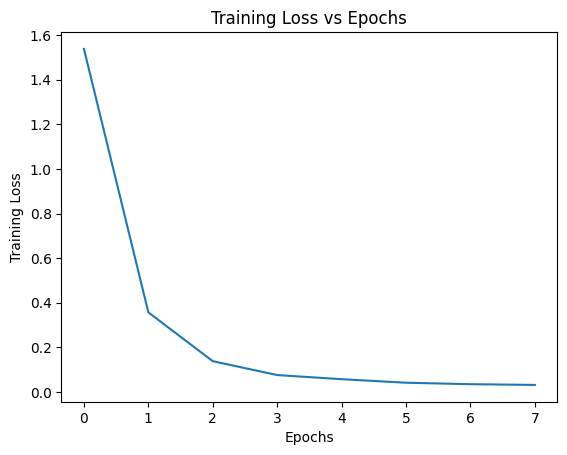

In [ ]:
plt.plot(history.history['loss'])
plt.title('Training Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show()